In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
def plotTwo(img1, img2):
    imPlot1 = img1[:,:,::-1]
    imPlot2 = img2[:,:,::-1]

    width, height = imPlot1.shape[:2]

    fig = plt.figure(figsize=(width/10, height/10))

    columns = 2
    rows = 1

    fig.add_subplot(rows, columns, 1)
    plt.imshow(imPlot1)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(imPlot2)
    
    plt.show()

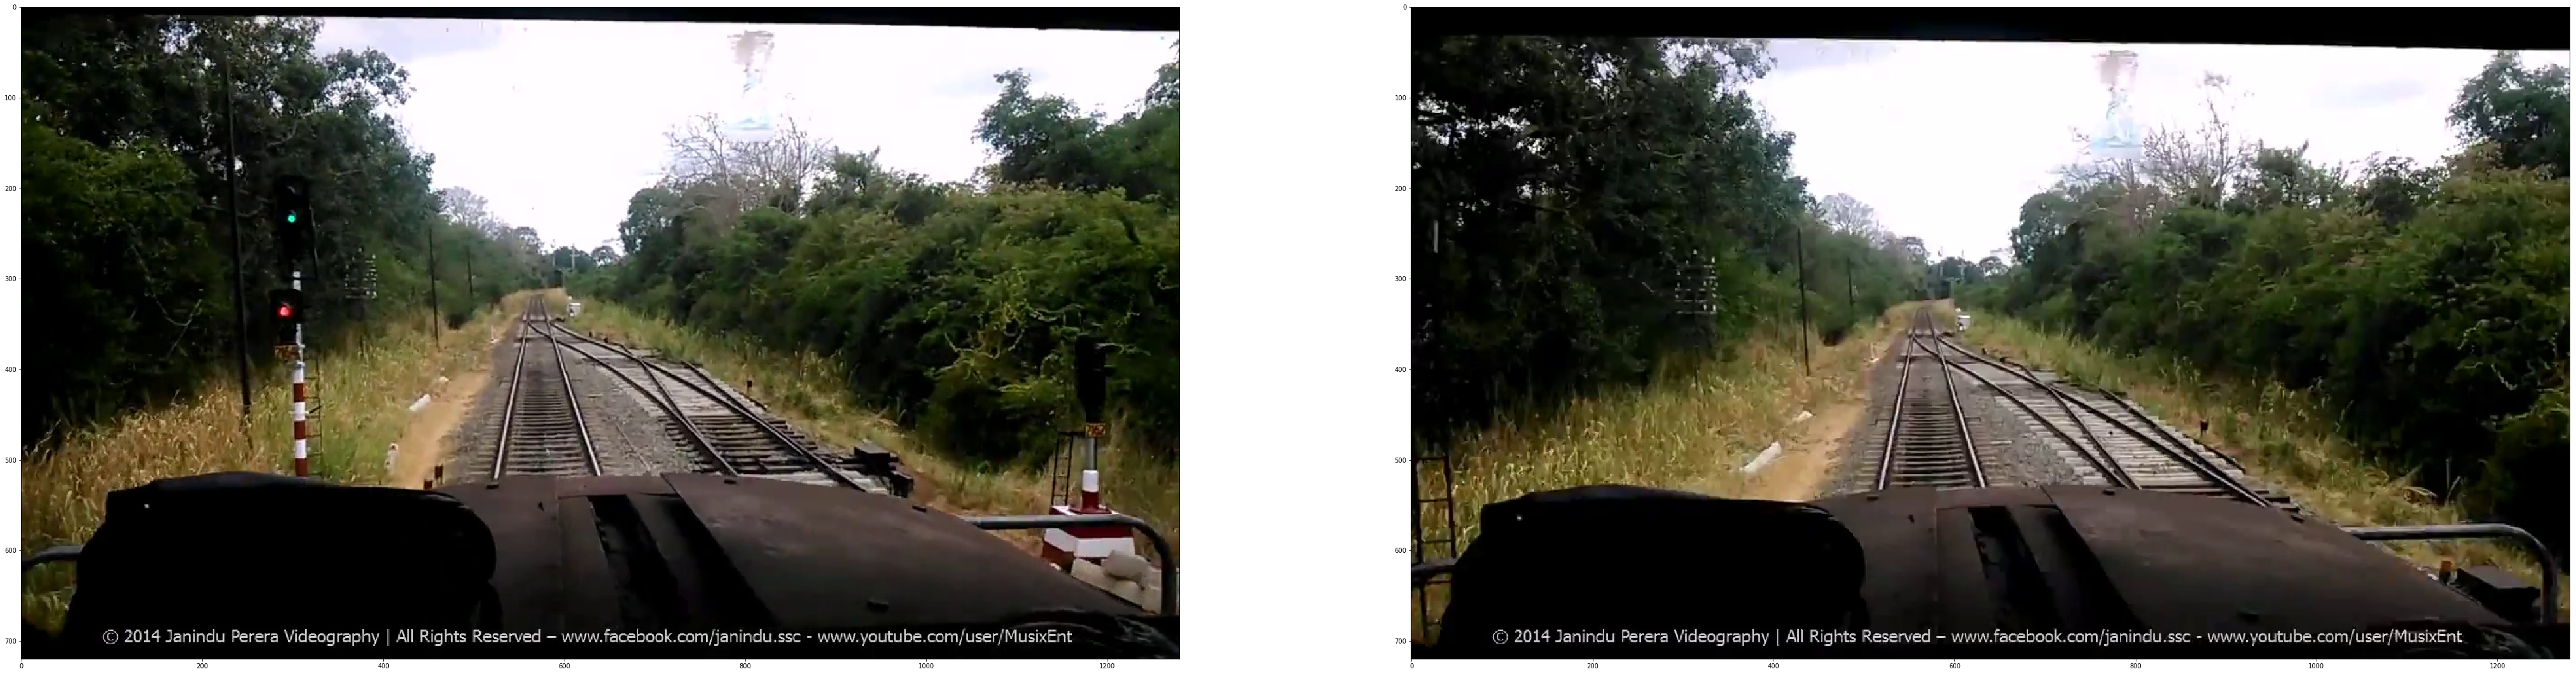

In [3]:
imLights = cv.imread('..\\images\\frame24.jpg')
imNoLights = cv.imread('..\\images\\frame25.jpg')

imLights2 = imLights.copy()
imNoLights2 = imNoLights.copy()

plotTwo(imLights, imNoLights)



In [4]:
def drawContours(img):
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cont = cv.drawContours(img, contours, -1, (0,255,0), 3)

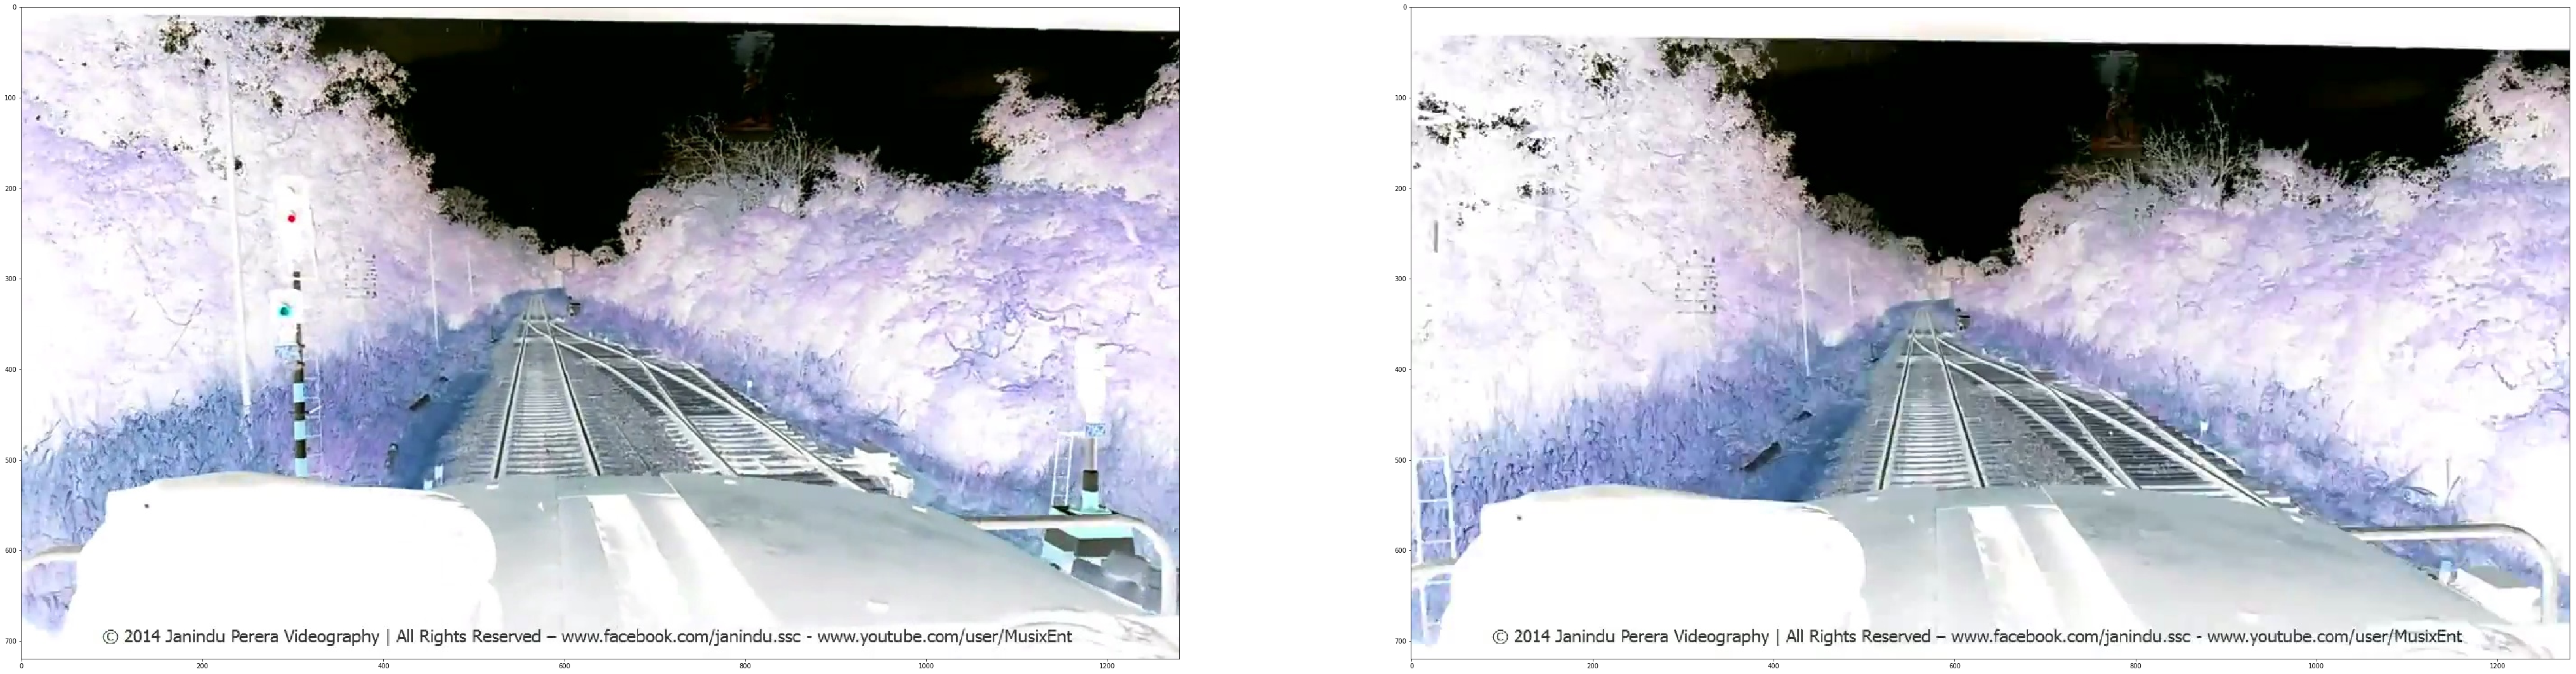

In [5]:
inverted1 = (255-imLights)
inverted2 = (255-imNoLights)

plotTwo(inverted1, inverted2)

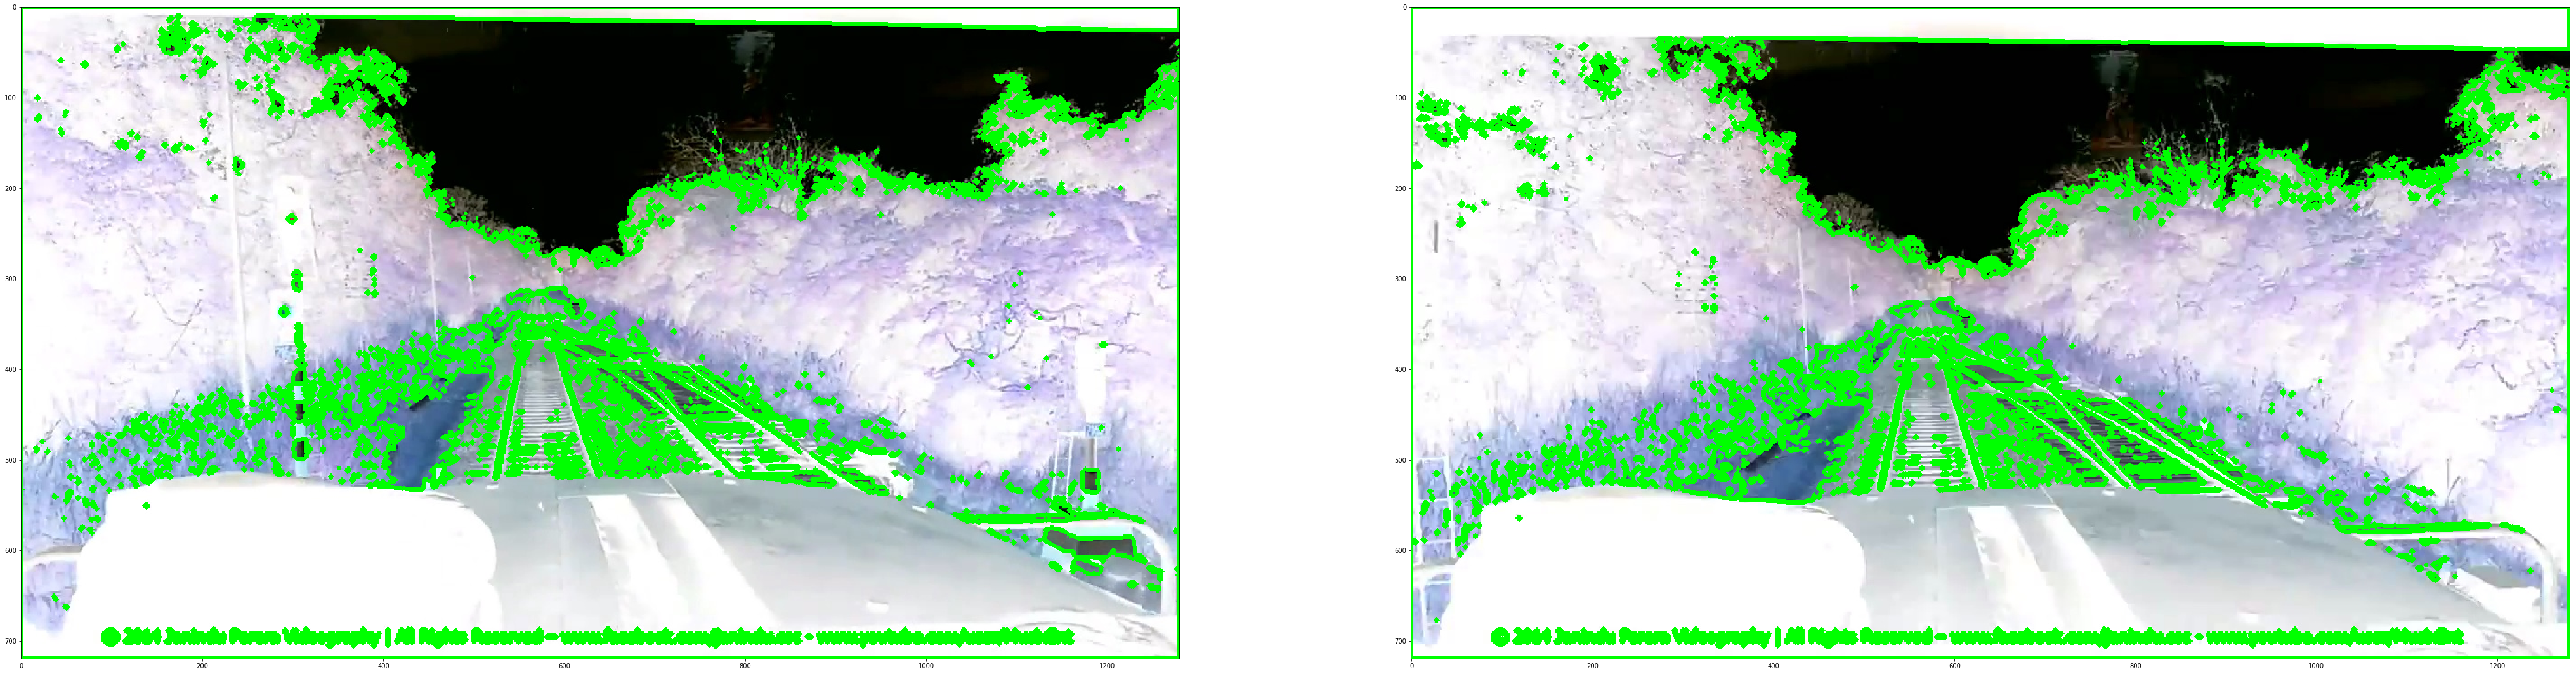

In [6]:
drawContours(inverted1)
drawContours(inverted2)

plotTwo(inverted1, inverted2)

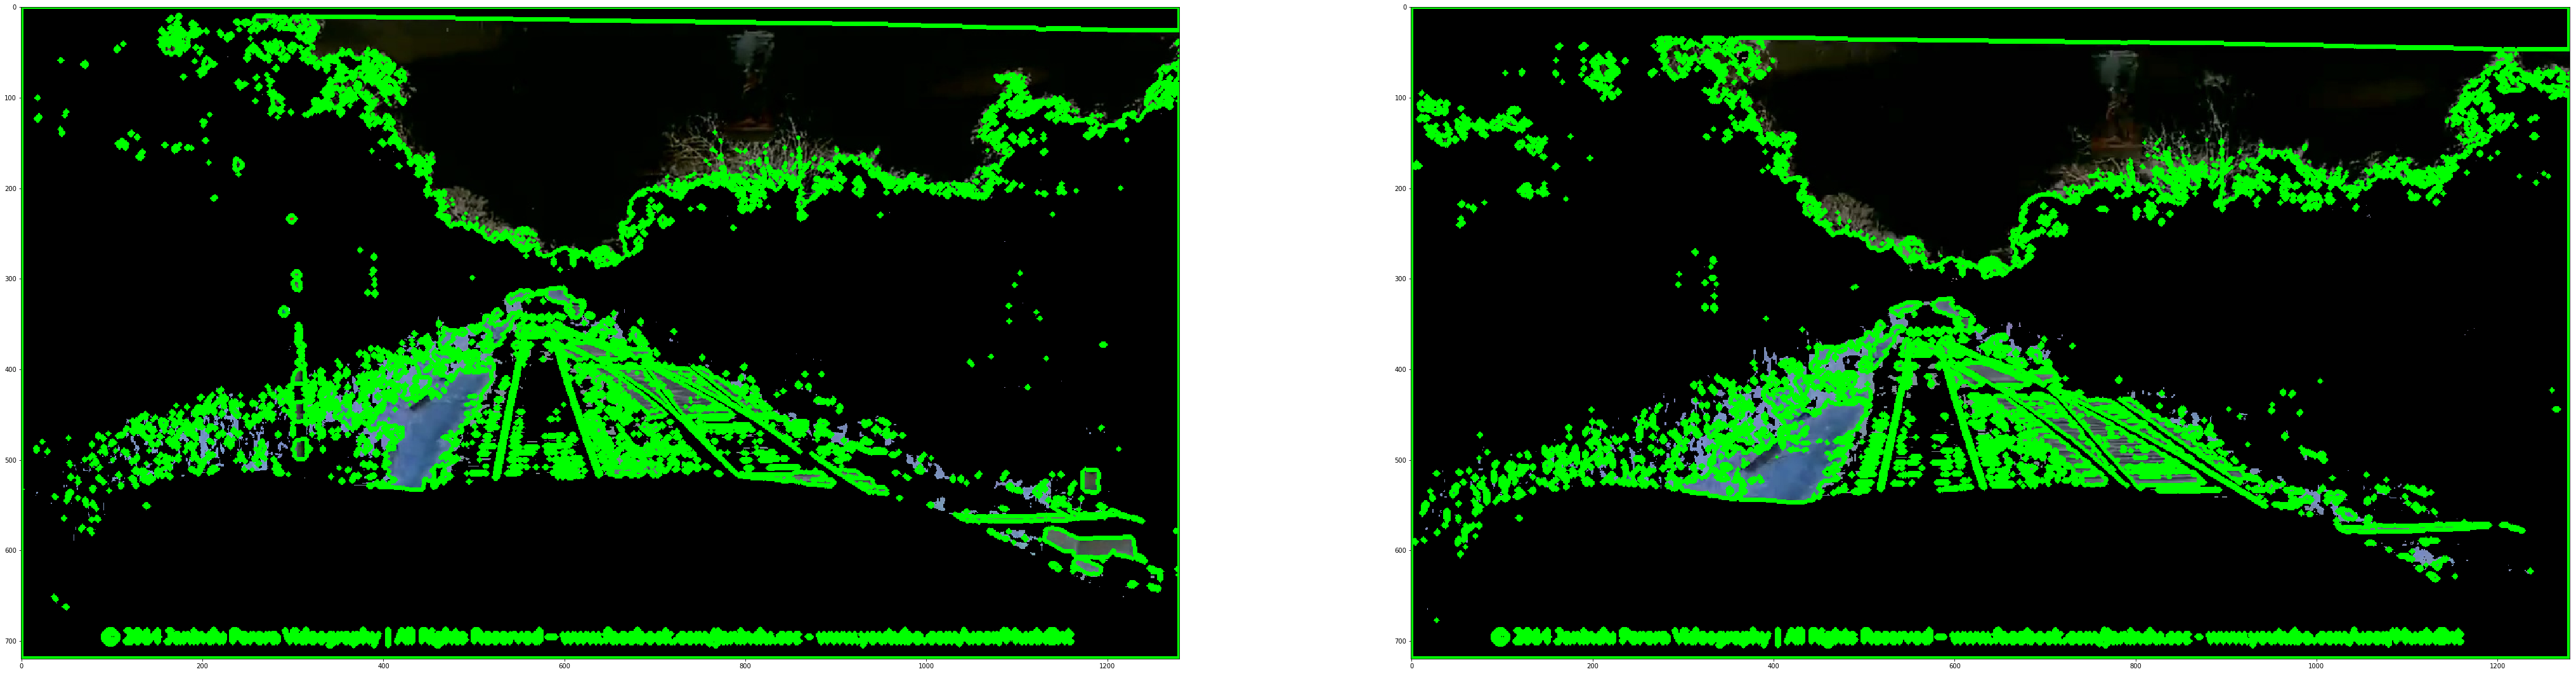

In [7]:
inverted1[np.where((inverted1 > [127,127,127]).all(axis = 2))] = [0,0,0]
inverted2[np.where((inverted2 > [127,127,127]).all(axis = 2))] = [0,0,0]
plotTwo(inverted1, inverted2)

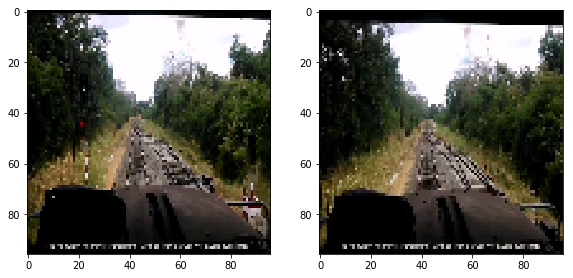

In [13]:
w = 96
h = 96
img1 = cv.resize(imLights,(w,h))
img2 = cv.resize(imNoLights,(w,h))
plotTwo(img1, img2)

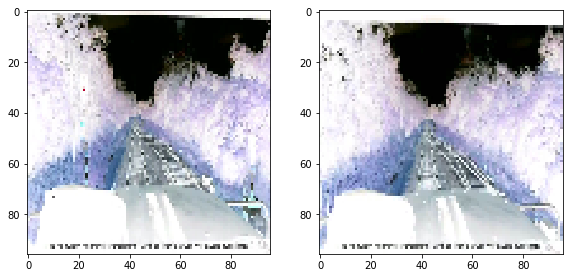

In [14]:
invertedSmall1 = (255-img1)
invertedsmall2 = (255-img2)

plotTwo(invertedSmall1, invertedsmall2)